In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv(r"C:\Users\revan\Downloads\Age Prediction.csv")

In [7]:
data.head()

,ID,Age_group,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
0,73564,Adult,61,2,2,35.7,110,2,150,14.91
1,73568,Adult,26,2,2,20.3,89,2,80,3.85
2,73576,Adult,16,1,2,23.2,89,2,68,6.14
3,73577,Adult,32,1,2,28.9,104,2,84,16.15
4,73580,Adult,38,2,1,35.9,103,2,81,10.92


In [9]:
data.tail()

,ID,Age_group,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
2273,83711,Adult,38,2,2,33.5,100,2,73,6.53
2274,83712,Adult,61,1,2,30.0,93,2,208,13.02
2275,83713,Adult,34,1,2,23.7,103,2,124,21.41
2276,83718,Adult,60,2,2,27.4,90,2,108,4.99
2277,83727,Adult,26,1,2,24.5,108,2,108,3.76


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2278 non-null   int64  
 1   Age_group                    2278 non-null   object 
 2   Age                          2278 non-null   int64  
 3   Gender                       2278 non-null   int64  
 4   PAQ605                       2278 non-null   int64  
 5   Body Mass Index              2278 non-null   float64
 6   Blood Glucose after fasting  2278 non-null   int64  
 7   Diabetic or not              2278 non-null   int64  
 8   Respondent's Oral            2278 non-null   int64  
 9   Blood Insulin Levels         2278 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 178.1+ KB


In [13]:
data.shape

(2278, 10)

In [15]:
data.describe()

,ID,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [17]:
data.columns

Index(['ID', 'Age_group', 'Age', 'Gender', 'PAQ605', 'Body Mass Index',
       'Blood Glucose after fasting', 'Diabetic or not', 'Respondent's Oral',
       'Blood Insulin Levels'],
      dtype='object')

In [19]:
data["Blood Insulin Levels"].value_counts()

Blood Insulin Levels
6.61     8
5.04     7
6.50     6
6.75     6
4.86     6
        ..
13.73    1
5.95     1
15.03    1
6.64     1
3.76     1
Name: count, Length: 1424, dtype: int64

In [21]:
data.isnull()

,ID,Age_group,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2273,False,False,False,False,False,False,False,False,False,False
2274,False,False,False,False,False,False,False,False,False,False
2275,False,False,False,False,False,False,False,False,False,False
2276,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum

In [5]:
# Drop rows with NaN values
if data.isnull().sum().any():
    data = data.dropna()

In [7]:
# Select features for clustering
features = data.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns

In [9]:
# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [11]:
# Apply DBSCAN
eps_value = 0.5  # Maximum distance between two samples for them to be in the same neighborhood
min_samples_value = 5  # Minimum number of samples to form a dense region
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(features_scaled)

In [13]:
# Add cluster labels to the dataset
data['Cluster'] = clusters

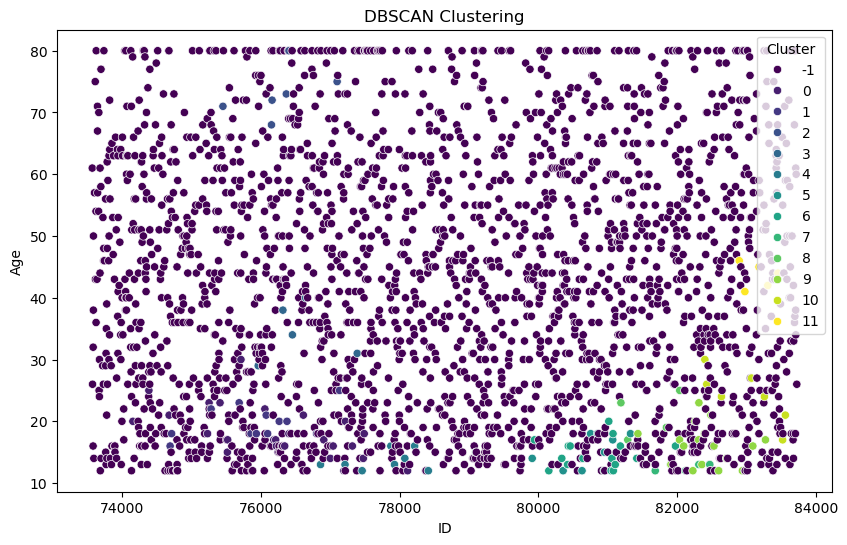

In [15]:
# Visualize the clusters (if the data has 2 or 3 features)
if features.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=features.iloc[:, 0], y=features.iloc[:, 1], hue=data['Cluster'], palette='viridis', legend='full'
    )
    plt.title('DBSCAN Clustering')
    plt.xlabel(features.columns[0])
    plt.ylabel(features.columns[1])
    plt.legend(title='Cluster')
    plt.show()

In [17]:
# Print cluster counts
cluster_counts = data['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
Cluster
-1     2156
 0       27
 6       17
 9       17
 1       12
 4        8
 5        8
 10       7
 2        6
 7        6
 3        5
 11       5
 8        4
Name: count, dtype: int64
